# Работа с количественными признаками

Для визуализации распределения количественных признаков используются следующие типы графиков:

- [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html)
- [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [`rugplot`](https://seaborn.pydata.org/generated/seaborn.rugplot.html)
- [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Можно так же визуализировать относительные распределения между парами переменных при помощи методов:

- [`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)
- [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

# Работа с количественными признаками

Для визуализации распределения количественных признаков используются следующие типы графиков:

- `displot` — **функция уровня фигуры** (figure-level) для отображения распределений. Умеет рисовать **гистограммы**, **ядровые оценки плотности (KDE)** и **ECDF**; поддерживает разбиение на подграфики по `row`, `col`, `hue`. Возвращает `FacetGrid`.  
  **Ключевые аргументы:** `kind={"hist","kde","ecdf"}`, `bins`, `binwidth`, `stat`, `common_norm`, `fill`, `row`, `col`, `hue`, `col_wrap`, `height`, `aspect`.

- `jointplot` — **двумерный график** совместного распределения двух переменных с **маргинальными** распределениями по осям. Подходит для изучения связи + формы одноточечных распределений. Возвращает `JointGrid`.  
  **Ключевые аргументы:** `x`, `y`, `kind={"scatter","kde","hist","hex","reg","resid"}`, `hue`, `height`, `ratio`, `space`.

- `rugplot` — **«ковровая» диаграмма**: короткие штрихи вдоль оси X/Y, отмечающие **каждое наблюдение**. Хороша как маргинальная добавка к гистограмме/KDE.  
  **Ключевые аргументы:** `x`/`y`, `height`, `expand_margins`, `linewidth`.

- `kdeplot` — **ядровая оценка плотности** для 1D или 2D данных. Показывает сглаженную форму распределения; в 2D может рисовать **изолинии** или заливку.  
  **Ключевые аргументы:** `x`, `y`, `bw_method` (ширина окна), `fill`, `levels`, `thresh`, `cut`, `gridsize`, `cumulative`, `common_norm`.

Можно также визуализировать **относительные распределения между парами переменных** при помощи следующих методов:

- `PairGrid` — **класс сетки парных графиков**. Создаёт матрицу подграфиков и даёт гибко «мэппить» разные функции в **верхний/нижний** треугольник и **диагональ** (например, scatter снизу, KDE сверху, гистограммы по диагонали).  
  **Ключевые аргументы/методы:** конструктор `PairGrid(data, vars, hue, corner, height, aspect)`; методы `map`, `map_upper`, `map_lower`, `map_diag`, `add_legend`.

- `pairplot` — **удобная обёртка над `PairGrid`** для быстрого построения матрицы парных графиков «по умолчанию». Меньше кода, разумные пресеты.  
  **Ключевые аргументы:** `data`, `vars`, `hue`, `kind={"scatter","kde","hist","reg"}`, `diag_kind={"auto","hist","kde"}`, `corner`, `plot_kws`, `diag_kws`.

- `FacetGrid` — **общий класс фасетирования**: раскладывает один и тот же тип графика по подмножествам данных (граням) по `row`, `col`, `hue`. База для `displot`, `relplot`, `catplot`.  
  **Ключевые аргументы/методы:** конструктор `FacetGrid(data, row, col, hue, height, aspect, col_wrap, margin_titles)`; методы `map`, `map_dataframe`, `add_legend`, `set_axis_labels`.

---

## Глоссарий часто используемых параметров

- `x`, `y` — названия столбцов с данными для осей.
- `kind` — тип визуализации (гистограмма, KDE, scatter, hex и т.д.).
- `bins` — число/разбиение корзин гистограммы.
- `binwidth` — ширина корзины гистограммы.
- `stat` — что отображать по оси Y для гистограмм (`count`, `frequency`, `probability`, `density`).
- `bw_method` — метод/коэффициент выбора ширины окна KDE.
- `fill` — заливка под кривой/поверхностью (для KDE).
- `levels` — число/список уровней изолиний в 2D KDE.
- `thresh` — минимальный уровень плотности, ниже которого не рисовать.
- `cut` — насколько далеко за пределы данных расширять KDE.
- `gridsize` — разрешение сетки при расчёте KDE.
- `cumulative` — кумулятивное распределение (True/False).
- `hue` — группировка по категории с разным цветом.
- `row`, `col` — разбиение на строки/столбцы подграфиков.
- `col_wrap` — перенос столбцов фасеток в несколько строк.
- `height` — высота одной фасетки/ячейки (в дюймах).
- `aspect` — соотношение ширины к высоте для фасеток.
- `corner` — рисовать только нижний треугольник матрицы парных графиков.
- `ratio` — отношение высоты центрального графика к маргинальным (в `jointplot`).
- `space` — отступ между центральным и маргинальными графиками (в `jointplot`).
- `expand_margins` — добавлять поля вокруг штрихов в `rugplot`.
- `linewidth` — толщина линий/штрихов.

In [48]:
# параметр для стандарного отображения графиков
sns.set()


Посмотрим на графике **displot** распределение размера чека:


In [49]:
import pandas as pd
df=pd.read_csv('tips.csv')
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


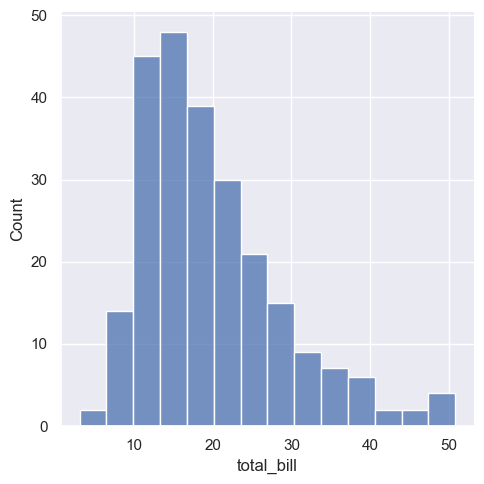

In [50]:
# Предполагается, что df уже существует в среде выполнения
import seaborn as sns
sns.displot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними.
Тип графика, используемый для этого, называется **jointplot**:

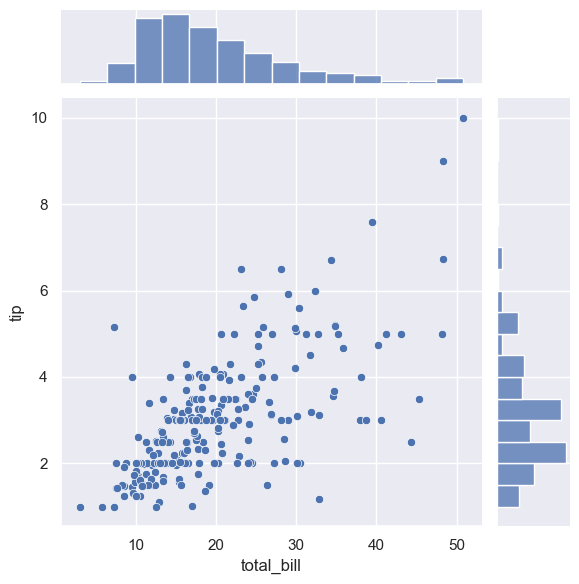

In [51]:
# kind="scatter" по умолчанию
sns.jointplot(x='total_bill', y='tip', data=df, kind="scatter")


Характер **представления информации** в центральной части графика регулируется с помощью параметра `kind`:

- `scatter`
- `reg`
- `resid`
- `kde`
- `hex`

Например, `kind='reg'` выводит на экран не только точки, представляющие данные об отдельных парах «размер чека» – «чаевые», но и **линию регрессии**, выражающую общий характер связи между двумя величинами.


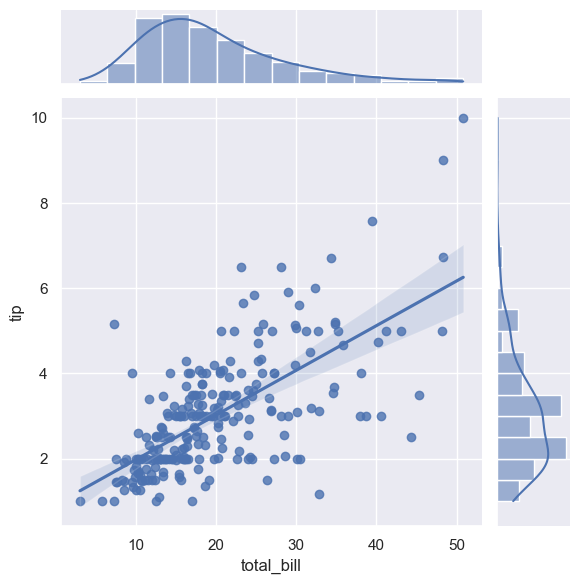

In [52]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')


Графики **плотности распределения** отображаются с помощью `kdeplot` или `rugplot`
(чем плотнее расположены линии, тем выше плотность). Лучше использовать их совместно с другими видами графиков:


<Axes: xlabel='total_bill', ylabel='Density'>

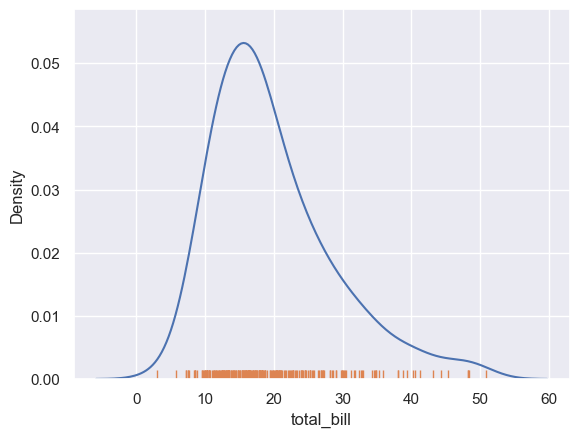

In [53]:
sns.kdeplot(df['total_bill'])
sns.rugplot(df['total_bill'])

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — **построить график типа `pairplot`** - показывает отношения между всеми парами переменных:

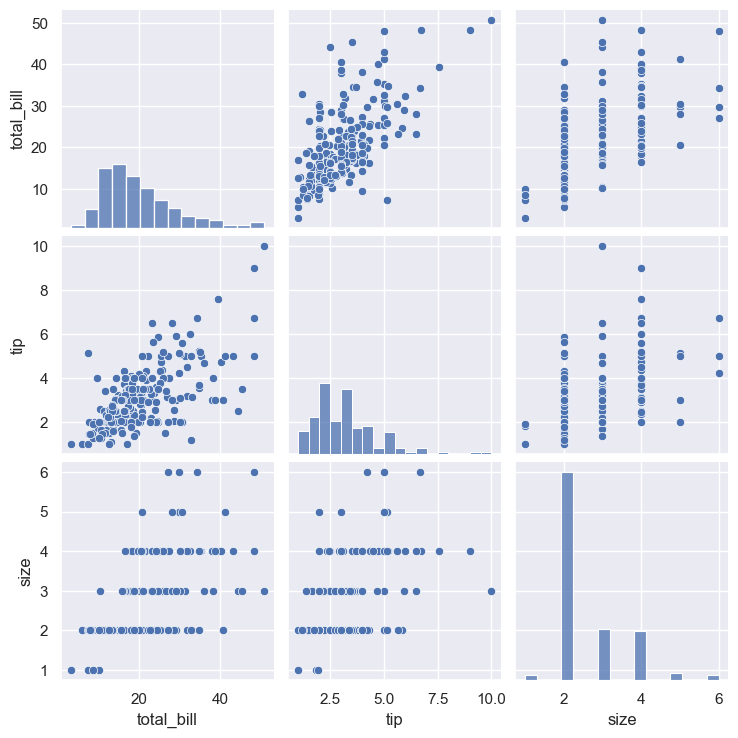

In [54]:
sns.pairplot(df)

За попарное распределение количественных признаков с группировкой по какому-либо признаку отвечает параметр `hue`, например, группировка по признаку **Пол** (установим палитру `palette='Set1'`):

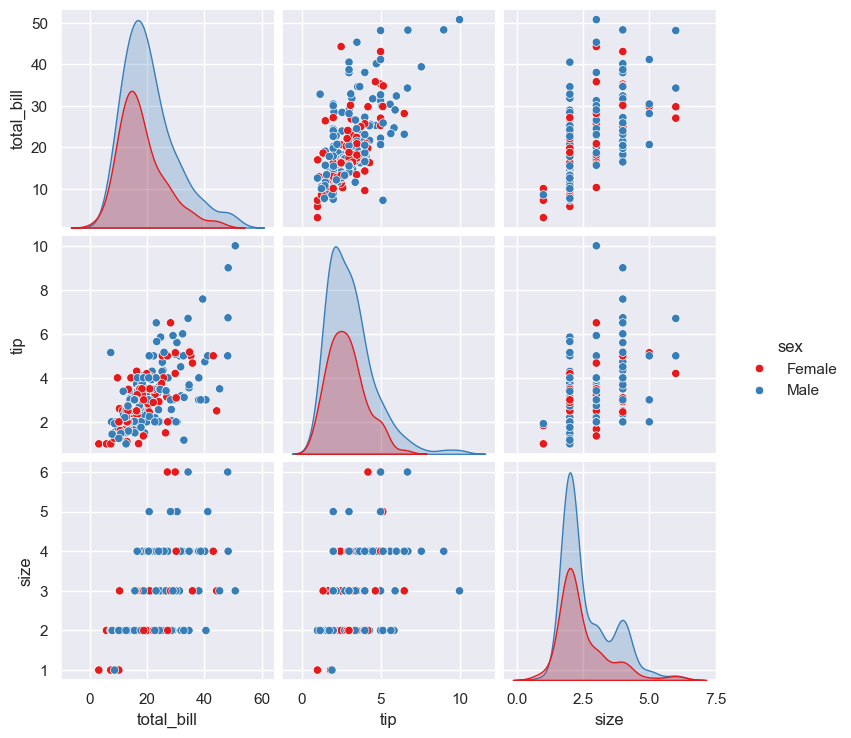

In [55]:
sns.pairplot(df, hue="sex", palette="Set1")

Метод **`pairplot` — это упрощённая версия функции `PairGrid`** (по диагонали отобразим гистограммы распределения признаков, поверх диагонали – плотность распределение признаков, снизу диагонали - графики двумерной плотности распределение признаков):

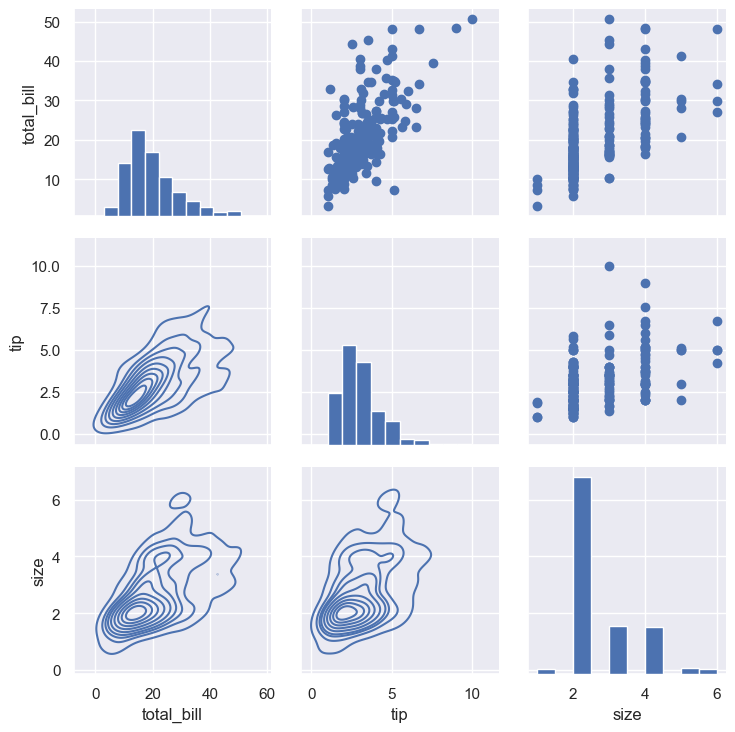

In [56]:
import matplotlib.pyplot as plt

fig = sns.PairGrid(df)
fig.map_diag(plt.hist) # образа внимание, что в sns нет hist (и др) графиков
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot) # образа внимание, что в plt нет kde графиков

`FacetGrid` позволяет визуализировать совместное распределение отдельных признаков нескольких переменных, например время посещения ресторана и курящих/некурящих:

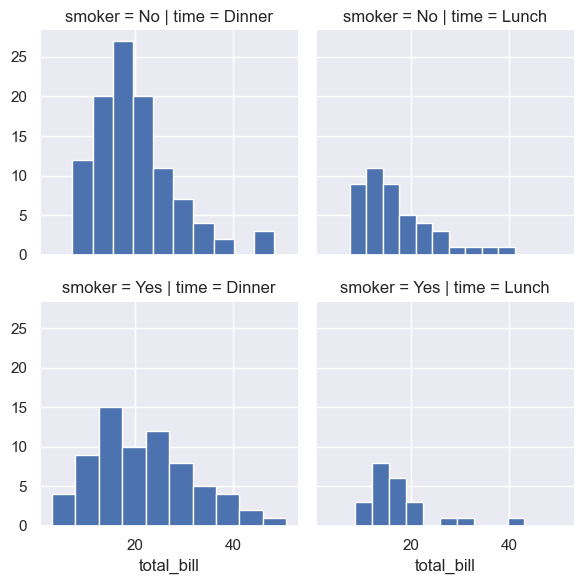

In [57]:
fig = sns.FacetGrid(df, col="time", row="smoker")
fig.map(plt.hist, "total_bill")

## Визуализация категориальных данных в Seaborn

В **Pandas** и **Matplotlib** для отображения информации о качественных (категориальных) признаках на диаграммах часто приходится предварительно обрабатывать DataFrame, группируя нужные данные.  

В **Seaborn** такой необходимости нет — при построении графиков можно напрямую обращаться к столбцам с категориальными признаками.

---

### Встроенные функции Seaborn для категориальных данных и их описание

- **`countplot`** — строит столбчатую диаграмму, отображающую количество наблюдений в каждой категории.
- **`barplot`** — строит столбчатую диаграмму, показывающую агрегированное (например, среднее) значение количественного признака по категориям.
- **`boxplot`** — строит ящичковую диаграмму (box-and-whisker plot), отображающую распределение числового признака по категориям, включая медиану, квартили и выбросы.
- **`violinplot`** — сочетает ящичковую диаграмму и оценку плотности распределения, визуализируя форму распределения числового признака по категориям.
- **`stripplot`** — отображает отдельные наблюдения в виде точек, расположенных вдоль оси категориального признака (с возможным наложением точек).
- **`swarmplot`** — отображает отдельные наблюдения в виде точек, при этом точки автоматически распределяются, чтобы не перекрываться.
- **`catplot`** — универсальная функция-обёртка, позволяющая строить разные виды категориальных графиков (`kind='count'`, `kind='bar'`, `kind='box'` и др.) с единым интерфейсом и дополнительными возможностями по разбиению данных на подграфики (faceting).

---

<Axes: xlabel='day', ylabel='count'>

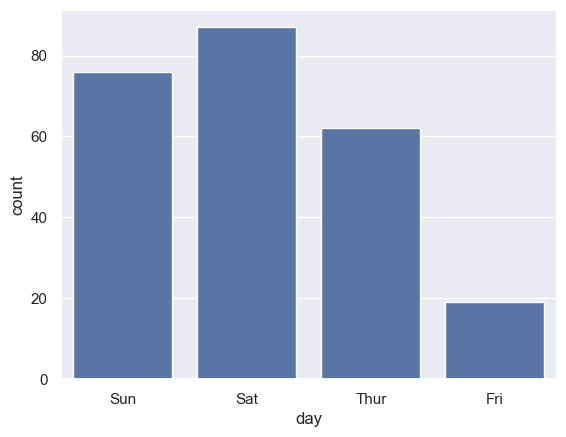

In [59]:
sns.countplot(x="day", data=df)

<Axes: xlabel='count', ylabel='day'>

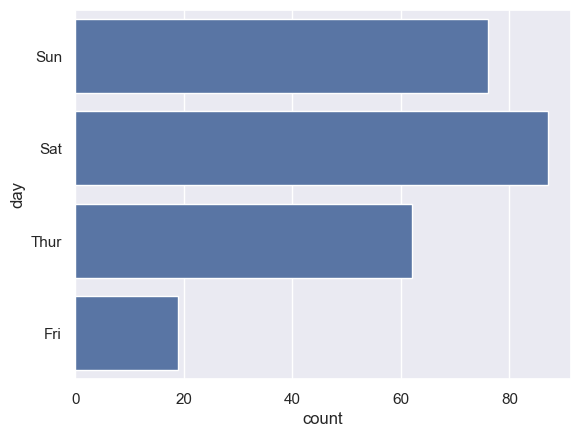

In [60]:
sns.countplot(y="day", data=df)

<Axes: xlabel='sex', ylabel='total_bill'>

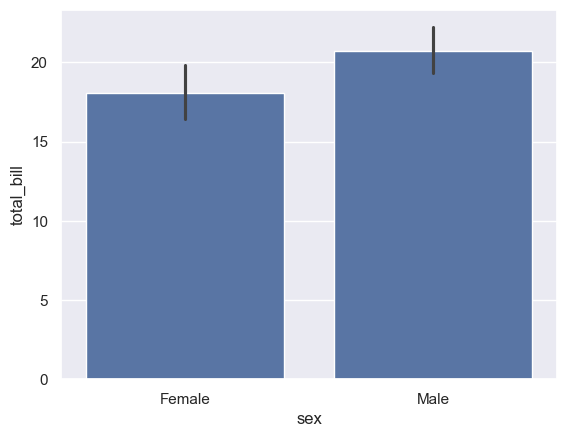

In [61]:
sns.barplot(x="sex", y="total_bill", data=df)

## Boxplot и Violinplot — изучение формы распределения

**Boxplot** (другое название — *ящик с усами* или *диаграмма размаха*) был разработан Джоном Тьюки в 1970-х годах.  
Это график, основными компонентами которого являются:

1. **Отрезок (Range)** — отражает диапазон значений набора данных.
2. **Прямоугольник (Box)** — отображает границы основного объёма данных:
   - Левая граница — 25%-й квантиль *(Q1, первый квартиль)*.
   - Правая граница — 75%-й квантиль *(Q3, третий квартиль)*.
3. **Усы (Whiskers)** — отметки на оси, представляющие левое и правое «крайние» значения данных.  
   Эти значения обычно не равны минимальному и максимальному значению набора.  
   Усы простираются на расстояние до `1.5 × IQR` влево и вправо от Q1 и Q3 соответственно,  
   где **IQR** (*Interquartile Range*, межквартильный диапазон) = `Q3 - Q1` — ширина прямоугольника.
4. **Выбросы (Outliers)** — значения, находящиеся за пределами усов.

---

![Пример boxplot](Рисунок2.png)

В функции ниже **нужно конкретно прописывать hue** (то есть конкретно, по какому аргументу будет раздление)

<Axes: xlabel='day', ylabel='total_bill'>

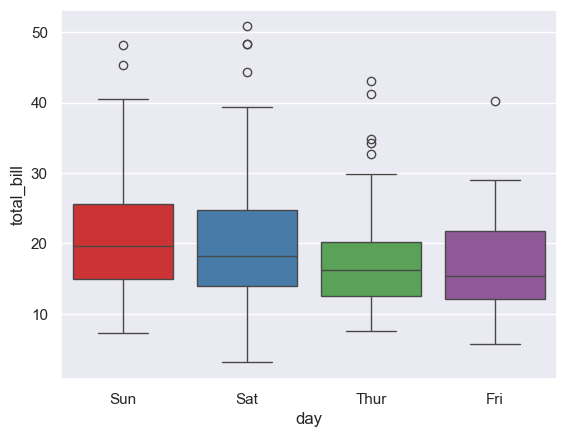

In [69]:
# На диаграмме ниже показывается, как менялась сумма чека в зависимости от дня недели: 
sns.boxplot(x="day", y="total_bill", hue='day', data=df, palette="Set1", legend=False)

Использование параметра `hue` - **способ увеличения информативности методов Seaborn**. Этот параметр позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. 

<Axes: xlabel='day', ylabel='total_bill'>

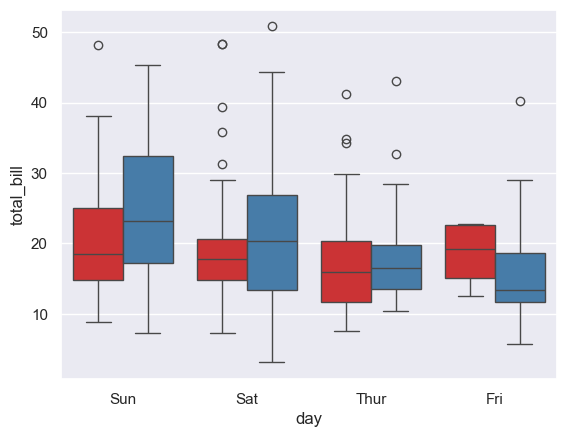

In [70]:
sns.boxplot(x="day", y="total_bill", hue='smoker', data=df, palette="Set1", legend=False)

#### Метод violinplot

Выполняет ту же функцию, что и `boxplot`. По сути это два повёрнутые на 90 и -90 градусов графика плотности распределения, слипшиеся друг с другом.

<Axes: xlabel='day', ylabel='total_bill'>

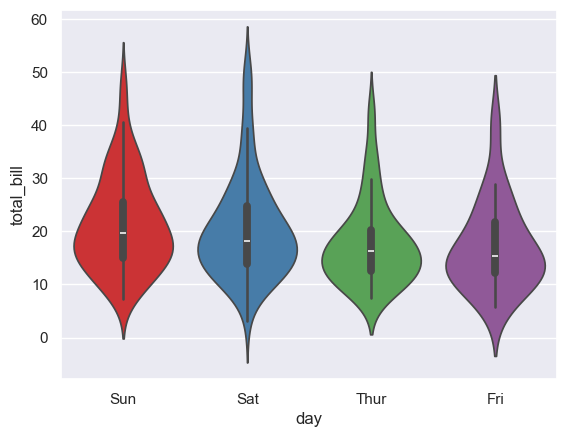

In [71]:
sns.violinplot(x="day", y="total_bill", hue="day", data=df, palette="Set1")

<Axes: xlabel='day', ylabel='total_bill'>

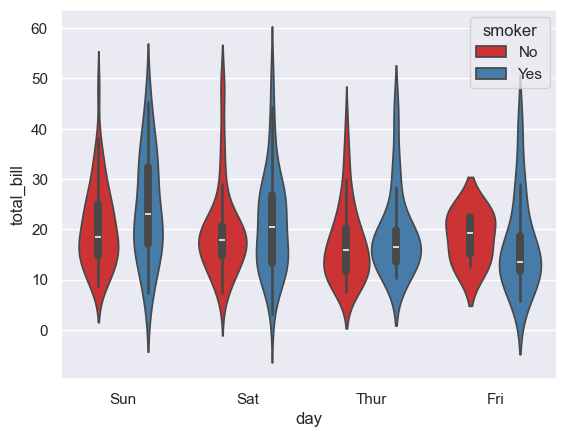

In [72]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=df, palette="Set1")

**`stripplot` рисует диаграмму рассеяния**, состоящую из одной категориальной переменной. Его можно использовать как самостоятельную фигуру, но лучше сочетать с другими графиками.

**`swarmplot` представляет собой так же диаграмму рассеяния**, с той лишь разницей, что **точки не накладываются друг на друга**

#### Про параметр dodge:
`dodge=True` говорит Seaborn:

“**Если у тебя есть группы по hue**, сдвинь их точки чуть в стороны, чтобы **каждая группа была в своём столбце** внутри категории”.

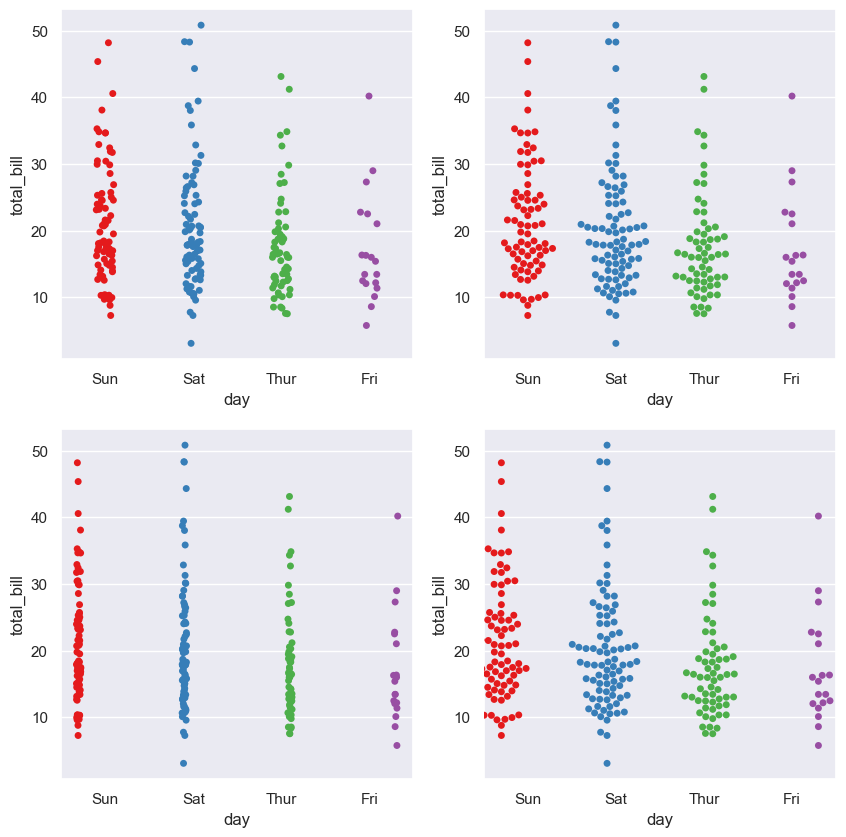

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.stripplot(
    x="day", y="total_bill", hue="day", data=df, palette="Set1",
    dodge=False, ax=axes[0][0]
)

sns.swarmplot(
    x="day", y="total_bill", hue="day", data=df, palette="Set1",
    dodge=False, ax=axes[0][1]
)

sns.stripplot(
    x="day", y="total_bill", hue="day", data=df, palette="Set1",
    dodge=True, ax=axes[1][0]
)

sns.swarmplot(
    x="day", y="total_bill", hue="day", data=df, palette="Set1",
    dodge=True, ax=axes[1][1]
)

plt.show()

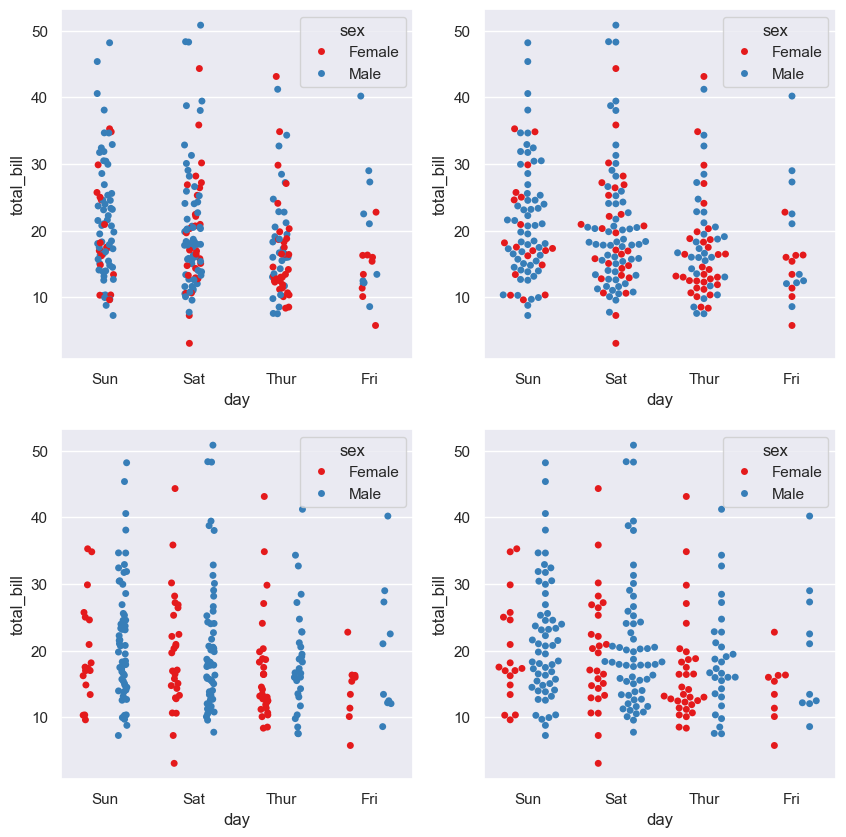

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.stripplot(
    x="day", y="total_bill", hue="sex", data=df, palette="Set1",
    dodge=False, ax=axes[0][0]
)

sns.swarmplot(
    x="day", y="total_bill", hue="sex", data=df, palette="Set1",
    dodge=False, ax=axes[0][1]
)

sns.stripplot(
    x="day", y="total_bill", hue="sex", data=df, palette="Set1",
    dodge=True, ax=axes[1][0]
)

sns.swarmplot(
    x="day", y="total_bill", hue="sex", data=df, palette="Set1",
    dodge=True, ax=axes[1][1]
)

plt.show()

## `catplot` в Seaborn

`catplot` — метод для отображения категориальных графиков на **FacetGrid**.  
Он обеспечивает доступ к нескольким функциям, которые показывают взаимосвязь между числовой и одной или несколькими категориальными переменными, используя одно из нескольких визуальных представлений.

В параметре `kind` задаётся вид функции.

---

### Категориальные диаграммы рассеяния:
- `stripplot()` — `kind="strip"` (по умолчанию)  
- `swarmplot()` — `kind="swarm"`

### Категориальное распределение:
- `boxplot()` — `kind="box"`  
- `violinplot()` — `kind="violin"`  
- `boxenplot()` — `kind="boxen"`

### Категориальная оценка:
- `pointplot()` — `kind="point"`  
- `barplot()` — `kind="bar"`  
- `countplot()` — `kind="count"`

---

### Пример
Аналог графика, построенного выше, с помощью метода `barplot`  
(только повернутого по горизонтали):

```python
sns.barplot(x='sex', y='total_bill', data=df)

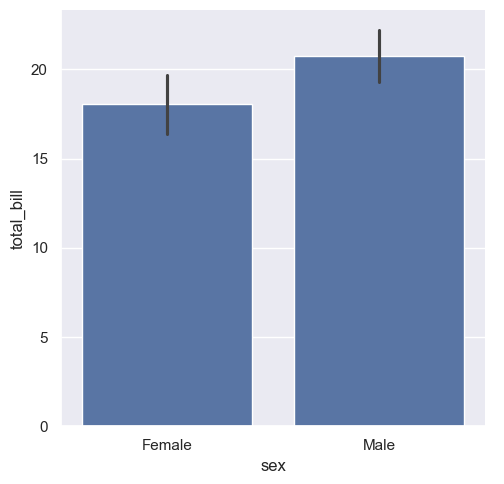

In [99]:
sns.catplot(x='sex', y='total_bill', data=df, kind="bar")

## Графики табличного типа

Степень связи между двумя величинами в **Seaborn** помогает оценить **корреляционный анализ**.  
Величина степени связи (коэффициент корреляции) может меняться от `-1` до `+1`:  
чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

---

### Тепловые карты (Heatmap)

Для отображения информации о результатах корреляционного анализа в **Seaborn** часто используются **тепловые карты** (`heatmap`).

**Порядок создания:**

1. **Вычисляем коэффициенты корреляции** между количественными признаками, содержащимися в датафрейме, с помощью метода `.corr()`.  
   Результат сохраним в датафрейм `cor_df`:
   ```python
   cor_df = df.corr()

2. **Созданный датафрейм** передаётся в качестве одного из параметров метода `heatmap`.  
  Для отображения в тепловой карте значений коэффициентов корреляции задаём параметр `annot=True`.  
  Для использования более ярких цветов задаём цветовую палитру:
  ```python
  sns.heatmap(cor_df, annot=True, cmap='coolwarm')
  ```

---

**Параметры:**

- **`annot=True`** — параметр, который указывает, что на тепловой карте будут отображаться численные значения коэффициентов корреляции прямо внутри каждой ячейки.  
  Если установить `annot=False` (значение по умолчанию), числа выводиться не будут.

- **`cmap="coolwarm"`** — параметр, отвечающий за цветовую палитру тепловой карты.  
  `"coolwarm"` — это встроенная градиентная палитра Seaborn/Matplotlib, в которой холодные цвета (синие) соответствуют отрицательным значениям, а тёплые (красные) — положительным.  
  Она удобна для отображения корреляций, так как сразу визуально различимы знаки и величина коэффициентов.

<Axes: >

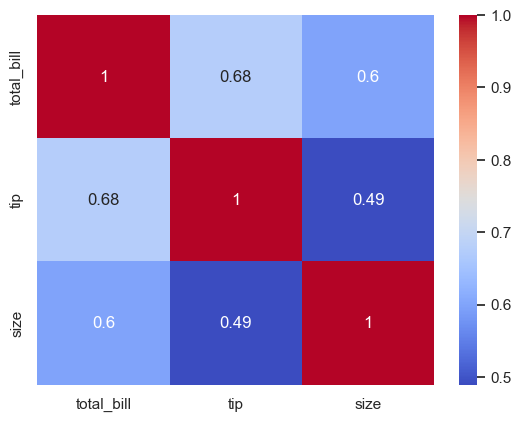

In [101]:
cor_df = df.corr()

sns.heatmap(cor_df, annot=True, cmap="coolwarm")

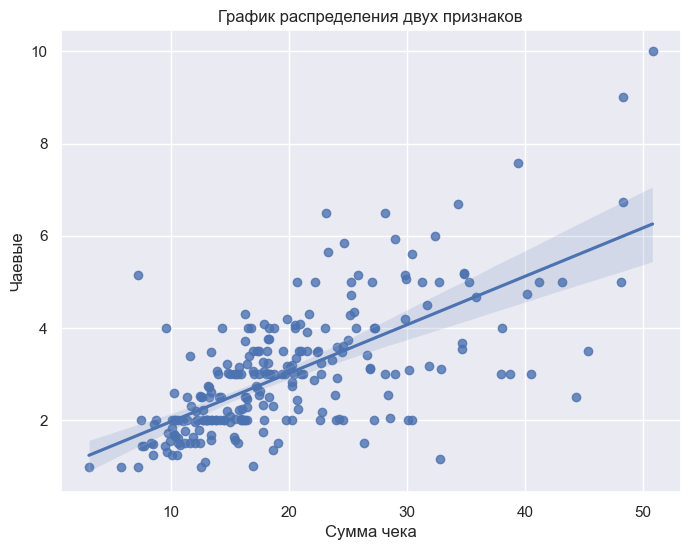

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='total_bill', y='tip', data=df, ax=ax)
ax.set_title('График распределения двух признаков')
plt.xlabel('Сумма чека')
plt.ylabel('Чаевые')
# fig.savefig('filename.png', dpi=150)
plt.show()

## Демонстрация преимуществ seaborn над стандартными методами matplotlib.

Для отображения информации о качественных признаках на диаграммах по методам библиотек **Pandas** и **Matplotlib** необходимо предварительно обрабатывать датафрейм, группируя нужные данные. Рассмотрим подробнее на примере построения гистограммы распределения количества посетителей по полу в зависимости от дня недели: код для отображения гистограммы, построенной методом `countplot` из библиотеки **seaborn**, получился в одну строку, код для метода `bar` библиотеки **matplotlib** записан больше десяти строк.



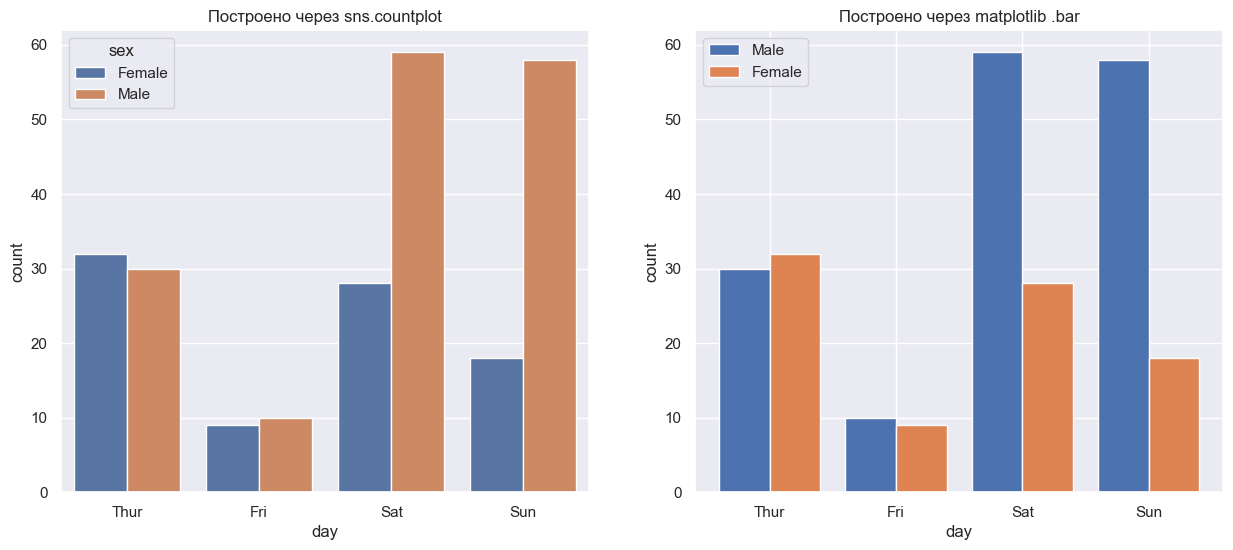

In [108]:
import numpy as np

def cnvrt(x):
    # функция для перевода текстового дня недели в число
    if x == 'Fri':
        return 5
    elif x == 'Sat':
        return 6
    elif x == 'Sun':
        return 7
    else:
        return 0

# добавление номера дня недели для сортировки
df['numd'] = df.day.apply(cnvrt)
# сортировка по дню недели
df.sort_values(by='numd', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# вывод гистограммы методом sns.countplot
sns.countplot(x='day', hue='sex', data=df, ax=ax[0])
ax[0].set_title(u'Построено через sns.countplot')

# вывод гистограммы методом .bar
# группировка датафрейма
grp = df.groupby(['day', 'sex']).tip.count().reset_index()
# добавление номера дня недели для сортировки
grp['numd'] = grp.day.apply(cnvrt)
# сортировка по дню недели
grp.sort_values(by='numd', inplace=True)
# метки по оси Х
xticks = grp.day.unique()
x = np.arange(len(xticks))
# толщина полосы
width = 0.4
# отображение меток
ax[1].set_xticks(x)
ax[1].set_xticklabels(xticks)
ax[1].set_xlabel('day')
ax[1].set_ylabel('count')
# вывод гистограммы
ax[1].bar(x - width / 2, grp.query('sex == "Male"').tip, width, label='Male')
ax[1].bar(x + width / 2, grp.query('sex == "Female"').tip, width, label='Female')
ax[1].set_title(u'Построено через matplotlib .bar')
# вывод легенды
ax[1].legend()
#
plt.show()